In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv",dtype = object,parse_dates=['report_date'])

data.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [3]:
data.fillna(0,inplace = True)
data.drop(columns=['time_period'],inplace=True)

In [18]:
data.drop(columns=['time_period_type'],inplace=True)
data.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


# 1. Show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [45]:
Arg_Cat_data = data.query("location == 'Argentina-Catamarca' and data_field_code == 'AR0005'")[['value','report_date']]
Arg_Cat_data.groupby('report_date').sum()
Arg_Cat_data['int_value']=pd.to_numeric(Arg_Cat_data.value)
Arg_Cat_data.drop(columns='value',inplace=True)
Arg_Cat_data = Arg_Cat_data.groupby('report_date').sum().reset_index()
Arg_Cat_data

,report_date,int_value
0,2016-03-19,14
1,2016-03-26,15
2,2016-04-02,15
3,2016-04-09,15
4,2016-04-16,15
5,2016-04-29,15
6,2016-05-07,16
7,2016-05-14,15
8,2016-05-22,16
9,2016-05-30,15


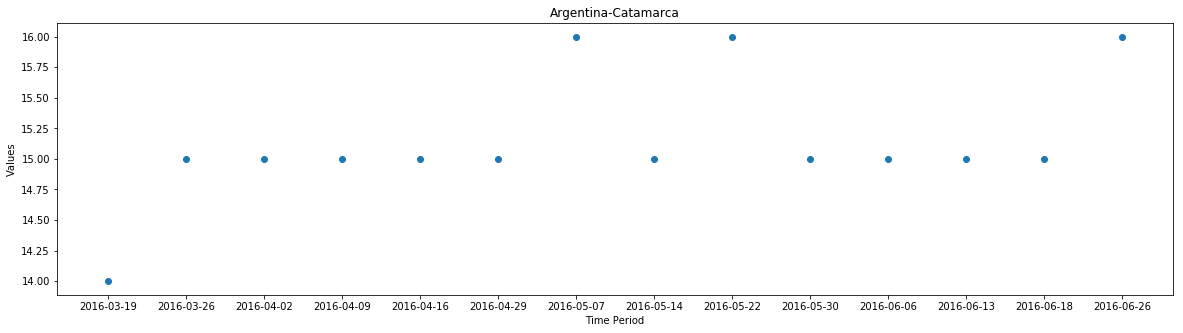

In [46]:
plt.figure(figsize = (20,5))
plt.xlabel("Time Period")
plt.ylabel("Values")
plt.title("Argentina-Catamarca")
plt.scatter(Arg_Cat_data.report_date,Arg_Cat_data.int_value)

# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [47]:
Arg_Cab_data =data.query("unit=='cases' and location == 'Argentina-CABA'")[['value','report_date']]
Arg_Cab_data['int_value']=pd.to_numeric(Arg_Cab_data.value)
Arg_Cab_data.drop(columns='value',inplace=True)
Arg_Cab_data = Arg_Cab_data.groupby('report_date').sum().reset_index()
Arg_Cab_data


,report_date,int_value
0,2016-03-19,78
1,2016-03-26,92
2,2016-04-02,94
3,2016-04-09,97
4,2016-04-16,98
5,2016-04-29,101
6,2016-05-07,255
7,2016-05-14,126
8,2016-05-22,260
9,2016-05-30,132


In [48]:
Arg_Cat_data =data.query("unit=='cases' and location == 'Argentina-Catamarca'")[['value','report_date']]
Arg_Cat_data['int_value']=pd.to_numeric(Arg_Cat_data.value)
Arg_Cat_data.drop(columns='value',inplace=True)
Arg_Cat_data = Arg_Cat_data.groupby('report_date').sum().reset_index()
Arg_Cat_data


,report_date,int_value
0,2016-03-19,14
1,2016-03-26,15
2,2016-04-02,15
3,2016-04-09,15
4,2016-04-16,15
5,2016-04-29,15
6,2016-05-07,16
7,2016-05-14,15
8,2016-05-22,16
9,2016-05-30,15


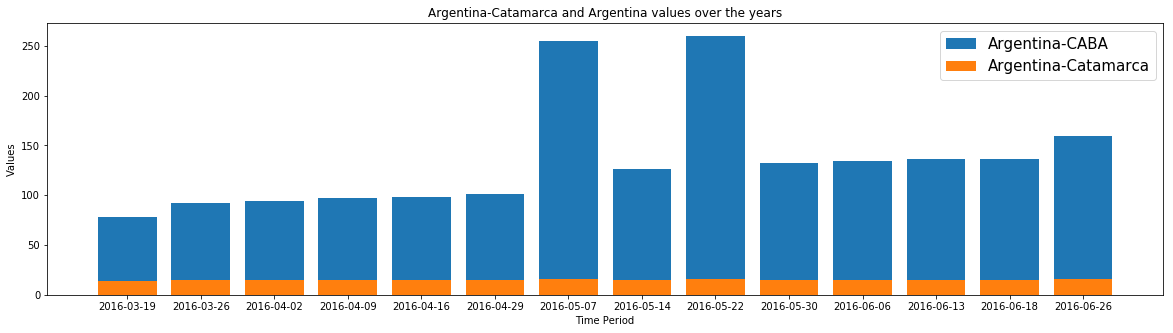

In [49]:
plt.figure(figsize=(20,5))
plt.xlabel("Time Period")
plt.ylabel("Values")
plt.title("Argentina-Catamarca and Argentina values over the years")
p1 = plt.bar(Arg_Cab_data.report_date,new_data1.int_value)
p2 = plt.bar(Arg_Cat_data.report_date,new_data.int_value)

plt.legend(['Argentina-CABA','Argentina-Catamarca'],fontsize=15)
plt.show()

In [10]:
data.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [50]:
arg_Bue = data.query("location == 'Argentina-Buenos_Aires'")[['data_field','value']]
arg_Bue['int_value']=pd.to_numeric(arg_Bue.value)
arg_Bue.drop(columns='value',inplace=True)
arg_Bue = arg_Bue.groupby('data_field').sum().reset_index().sort_values('int_value',ascending=False).head(4)
arg_Bue


,data_field,int_value
1,cumulative_cases_under_study,2981
0,cumulative_cases_discarded,251
2,cumulative_confirmed_imported_cases,32
4,cumulative_probable_imported_cases,15


In [51]:
arg_cab = data.query("location == 'Argentina-CABA'")[['data_field','value']]
arg_cab['int_value']=pd.to_numeric(arg_cab.value)
arg_cab.drop(columns='value',inplace=True)
arg_cab = arg_cab.groupby('data_field').sum().reset_index().sort_values('int_value',ascending=False).head(4)
arg_cab

,data_field,int_value
1,cumulative_cases_under_study,1748
2,cumulative_confirmed_imported_cases,124
0,cumulative_cases_discarded,27
3,cumulative_confirmed_local_cases,0


In [89]:
arg_cat = data.query("location == 'Argentina-Catamarca'")[['data_field','value']]
arg_cat['int_value']=pd.to_numeric(arg_cat.value)
arg_cat.drop(columns='value',inplace=True)
arg_cat = arg_cat.groupby('data_field').sum().reset_index().sort_values('int_value',ascending=False).head(4)
arg_cat

# 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

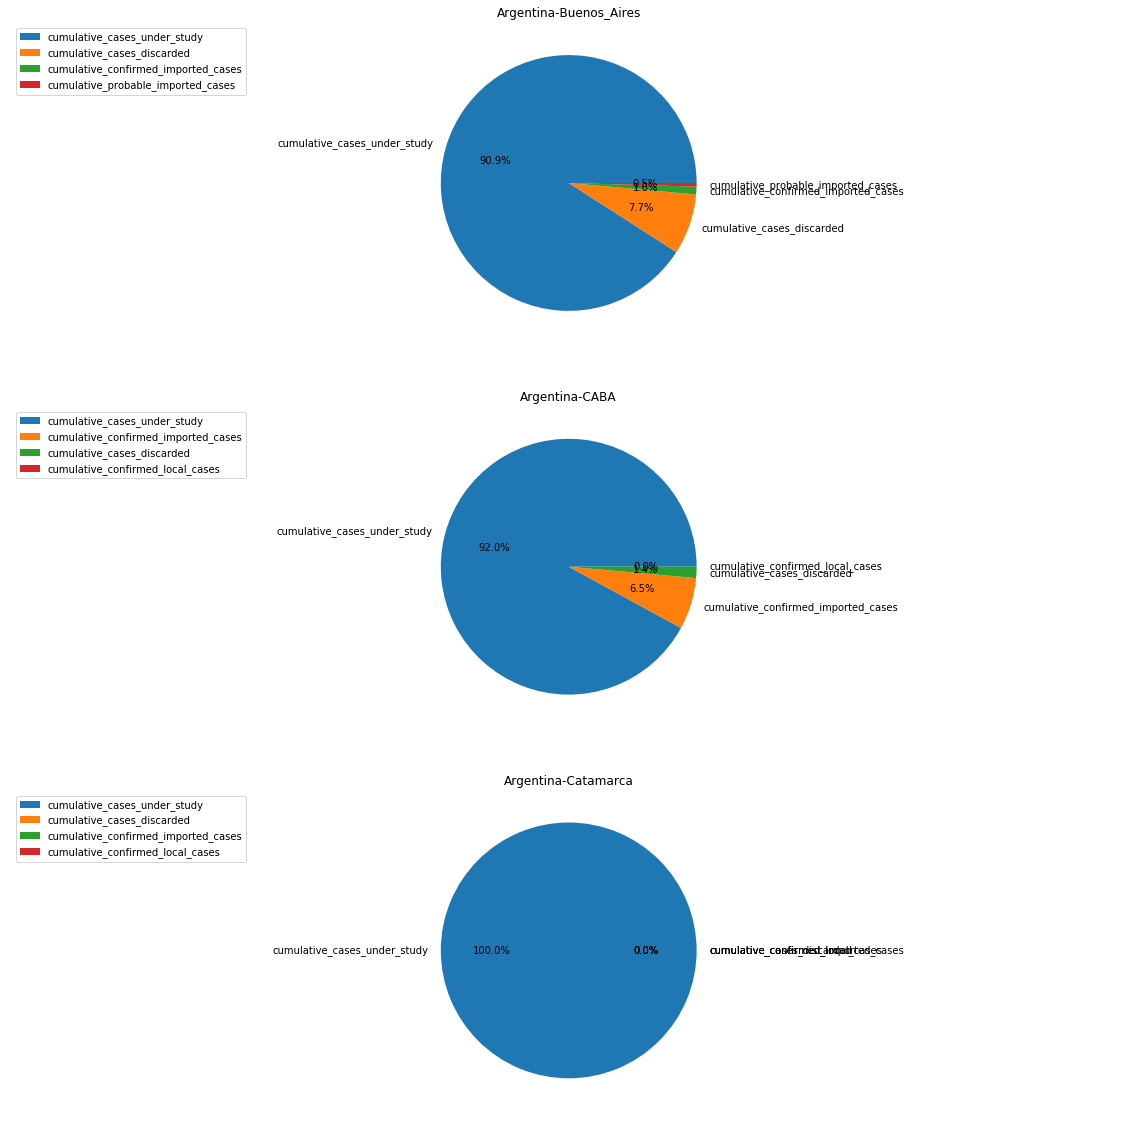

In [90]:
plt.figure(figsize=(20,20))
plt.subplot2grid((3,1),(0,0))
plt.axis('equal')
plt.title('Argentina-Buenos_Aires')
plt.pie(arg_Bue.int_value,labels=arg_Bue.data_field,autopct='%1.1f%%')
plt.legend(loc = 'upper left')
plt.subplot2grid((3,1),(1,0))
plt.axis('equal')
plt.title('Argentina-CABA')
plt.pie(arg_cab.int_value,labels=arg_cab.data_field,autopct='%1.1f%%')
plt.legend(loc = 'upper left')
plt.subplot2grid((3,1),(2,0))
plt.axis('equal')
plt.title('Argentina-Catamarca')
plt.pie(arg_cat.int_value,labels=arg_cat.data_field,autopct='%1.1f%%')
plt.legend(loc = 'upper left')

# 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [91]:
import difflib

In [113]:
def g(word):
    global big
    big = open("big.txt", "r")
    N = big.readlines()
    new_word = difflib.get_close_matches(word,N,n=1)
    if(new_word == []):
        print("Couldn't find any closest word")
    else:
        word1= new_word[0].rstrip('\n')
        print(f"The closest word is{word1}.")

In [114]:
word = input("Enter a word: \n")
g(word)

Enter a word: 
jhede
The closest word is hedge
